<a href="https://colab.research.google.com/github/rkarpin/ML_LAB/blob/main/ML_homework_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import torch
import torchvision
from matplotlib import pyplot

transform = torchvision.transforms.Compose(
    [ torchvision.transforms.ToTensor(), #Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
      torchvision.transforms.Normalize((0.1307), (0.3081))])

trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=2048,
                                          shuffle=True)   #we do shuffle it to give more randomizations to training epochs

testset = torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     transform=transform)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=1,
                                         shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 41.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.18MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.60MB/s]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(0.05)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.avg_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.avg_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Working on {device}")

net = LeNet5().to(device)
optimizer = torch.optim.Adam(net.parameters(), 0.001)   #initial and fixed learning rate of 0.001.

net.train()    #it notifies the network layers (especially batchnorm or dropout layers, which we don't use in this example) that we are doing traning
for epoch in range(16):  #  an epoch is a training run through the whole data set

    for batch, data in enumerate(trainloader):
        batch_inputs, batch_labels = data

        batch_inputs = batch_inputs.to(device)  #explicitly moving the data to the target device
        batch_labels = batch_labels.to(device)

        optimizer.zero_grad()

        batch_outputs = net(batch_inputs)   #this line calls the forward(self, x) method of the LeNet5 object. Please note,
                                            # the nonlinear activation after the last layer is NOT applied
        loss = torch.nn.functional.cross_entropy(batch_outputs, batch_labels, reduction = "mean") #instead, nonlinear softmax is applied internally in THIS loss function
        print("epoch:", epoch, "batch:", batch, "current batch loss:", loss.item())
        loss.backward()       #this computes gradients as we have seen in previous workshops
        optimizer.step()     #but this line in fact updates our neural network.
                                ####You can experiment - comment this line and check, that the loss DOE


Working on cpu
epoch: 0 batch: 0 current batch loss: 2.304612874984741
epoch: 0 batch: 1 current batch loss: 2.3005237579345703
epoch: 0 batch: 2 current batch loss: 2.297153949737549
epoch: 0 batch: 3 current batch loss: 2.2911834716796875
epoch: 0 batch: 4 current batch loss: 2.2835633754730225
epoch: 0 batch: 5 current batch loss: 2.2767996788024902
epoch: 0 batch: 6 current batch loss: 2.2682480812072754
epoch: 0 batch: 7 current batch loss: 2.2562851905822754
epoch: 0 batch: 8 current batch loss: 2.2402050495147705
epoch: 0 batch: 9 current batch loss: 2.2287063598632812
epoch: 0 batch: 10 current batch loss: 2.1997907161712646
epoch: 0 batch: 11 current batch loss: 2.179173469543457
epoch: 0 batch: 12 current batch loss: 2.1428186893463135
epoch: 0 batch: 13 current batch loss: 2.10783314704895
epoch: 0 batch: 14 current batch loss: 2.0634753704071045
epoch: 0 batch: 15 current batch loss: 2.0178070068359375
epoch: 0 batch: 16 current batch loss: 1.965185284614563
epoch: 0 batch:

In [ ]:

good = 0
wrong = 0

net.eval()              #it notifies the network layers (especially batchnorm or dropout layers, which we don't use in this example) that we are doing evaluation
with torch.no_grad():   #it prevents that the net learns during evalution. The gradients are not computed, so this makes it faster, too
    for batch, data in enumerate(testloader): #batches in test are of size 1
        datapoint, label = data

        prediction = net(datapoint.to(device))                  #prediction has values representing the "prevalence" of the corresponding class
        classification = torch.argmax(prediction)    #the class is the index of maximal "prevalence"

        if classification.item() == label.item():
            good += 1
        else:
            wrong += 1

print("accuracy = ", good/(good+wrong))

accuracy =  0.9814


# Zadanie 1

Cyfry są bardziej widoczne i bardziej przypominają cyfry z MNIST niż w te wygenerowane przez MLP. Dzięki warstwom konwolucji i poolingu sieć nauczyła się w przybliżeniu jak wygląda "kreska długopisu" i dzięki temu jest w stanie lepiej odtworzyć cyfry.

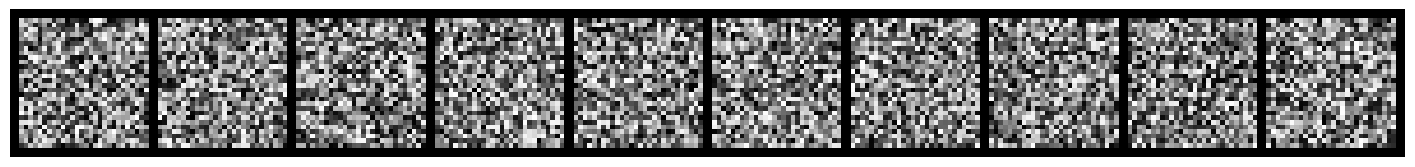

0 0.07564673572778702
1 0.0257978867739439
2 0.07887104898691177
3 0.06661143898963928
4 0.04334993660449982
5 0.16840681433677673
6 0.08765733987092972
7 0.008735083974897861
8 0.5477794408798218
9 0.04328637570142746


In [ ]:
import  matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torch.nn.functional as F

images = torch.rand(10, 1, 28, 28)
grid = make_grid(images, nrow=10, padding=2, normalize=True)
plt.figure(figsize=(18, 3))
plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap='gray')
plt.axis('off')
plt.show()

device = next(net.parameters()).device
probs = F.softmax(net(images.to(device)), dim=1).cpu()

for i in range(10):
    print(i, probs[i, i].item())

In [ ]:
criterion = nn.CrossEntropyLoss()


targets = torch.tensor([0,1,2,3,4,5,6,7,8,9],
                       dtype=torch.long,
                       device=device)





Lambda L2: 0


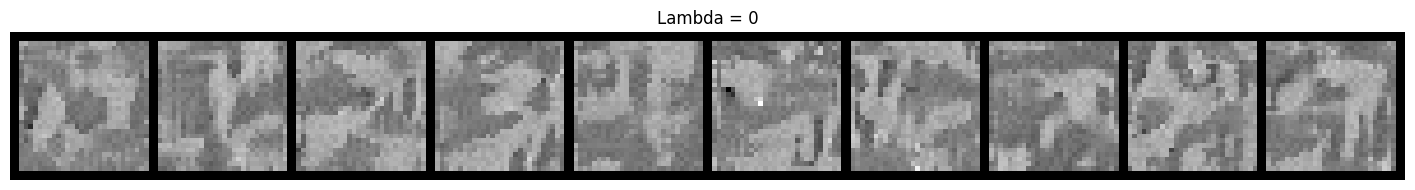

0 0.9999699592590332
1 0.9999855756759644
2 0.9999730587005615
3 0.9999773502349854
4 0.9999943971633911
5 0.999982476234436
6 0.9999698400497437
7 0.9999809265136719
8 0.9999865293502808
9 0.999971866607666

Lambda L2: 0.001


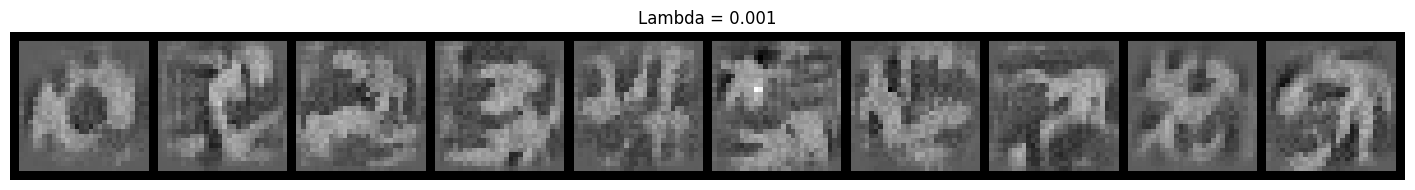

0 0.9999054670333862
1 0.9999390840530396
2 0.999930739402771
3 0.9999034404754639
4 0.9999903440475464
5 0.9998786449432373
6 0.9999256134033203
7 0.99996018409729
8 0.9999234676361084
9 0.9999297857284546

Lambda L2: 0.01


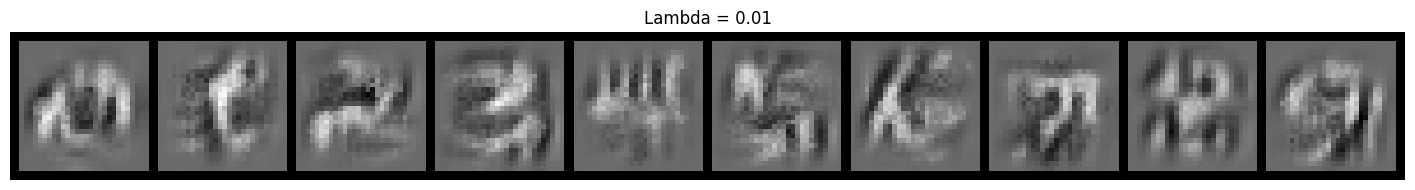

0 0.9994562268257141
1 0.9996693134307861
2 0.9996076226234436
3 0.999536395072937
4 0.9998089671134949
5 0.9997022747993469
6 0.999603807926178
7 0.999729573726654
8 0.9995490908622742
9 0.9996278285980225

Lambda L2: 0.1


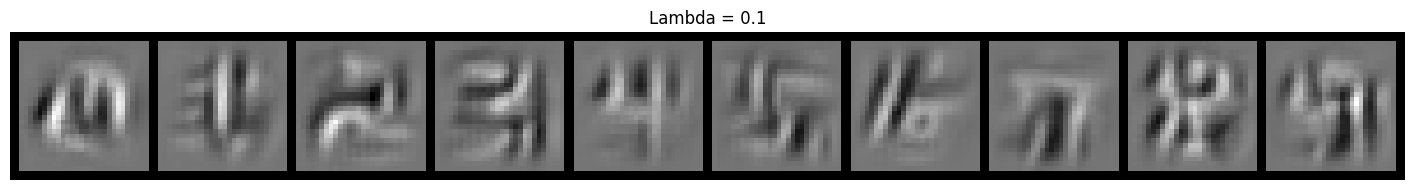

0 0.9967489242553711
1 0.9980315566062927
2 0.9972909092903137
3 0.9973570704460144
4 0.998680055141449
5 0.9983308911323547
6 0.9979534149169922
7 0.9983645081520081
8 0.9964863061904907
9 0.9973694086074829

Lambda L2: 1.0


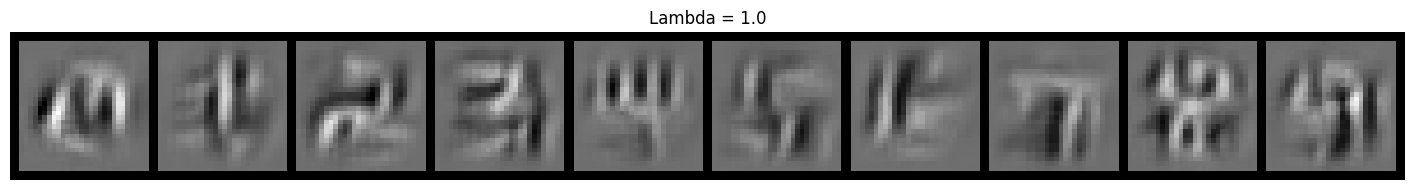

0 0.9770135283470154
1 0.9872903227806091
2 0.98134845495224
3 0.9816226959228516
4 0.9901930093765259
5 0.9888879656791687
6 0.986219584941864
7 0.9880838990211487
8 0.9759938716888428
9 0.9813885688781738

Lambda L2: 10.0


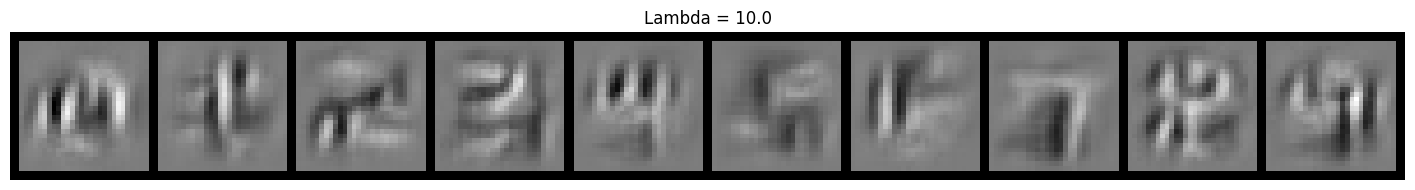

0 0.8690992593765259
1 0.9221262335777283
2 0.9023077487945557
3 0.9056284427642822
4 0.9382593631744385
5 0.9326439499855042
6 0.9176664352416992
7 0.9312631487846375
8 0.8622636795043945
9 0.886512041091919

Lambda L2: 100.0


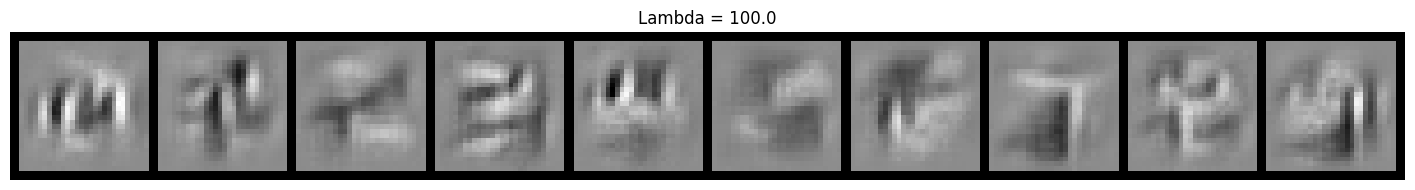

0 0.47062450647354126
1 0.5985948443412781
2 0.6260371804237366
3 0.6237494349479675
4 0.6676281690597534
5 0.7330021262168884
6 0.6362884044647217
7 0.6773512959480286
8 0.5204453468322754
9 0.5274123549461365

Lambda L2: 1000.0


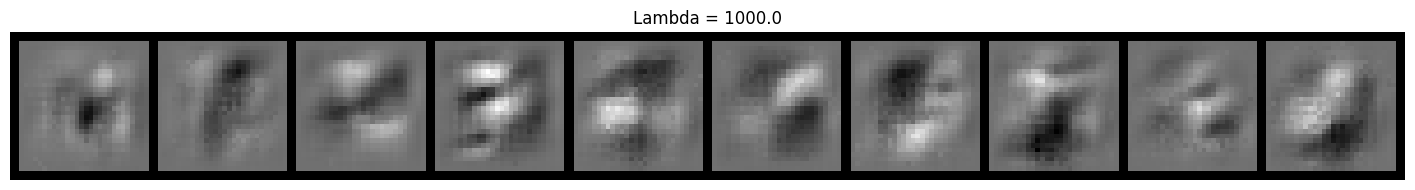

0 0.12643976509571075
1 0.24775242805480957
2 0.31622201204299927
3 0.2482936531305313
4 0.22900347411632538
5 0.44430112838745117
6 0.2950371503829956
7 0.26405051350593567
8 0.31742849946022034
9 0.18334625661373138


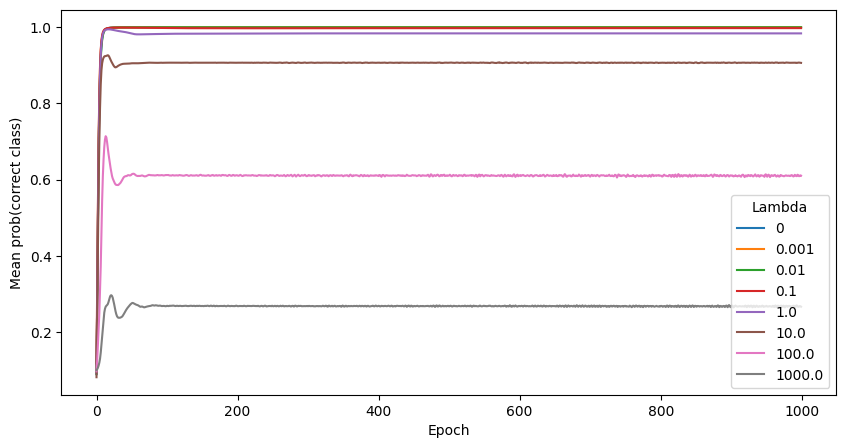

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

lambda_list = [0, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
targets = torch.arange(10, dtype=torch.long, device=device)
criterion = nn.CrossEntropyLoss()

prob_curves = []

for lam in lambda_list:
    print()
    print(f"Lambda L2: {lam}")
    images = torch.rand(10, 1, 28, 28, device=device, requires_grad=True)
    optimizer = torch.optim.Adam([images], lr=0.1)
    hist = []
    for _ in range(1000):
        optimizer.zero_grad()
        logits = net(images)
        loss = criterion(logits, targets) + lam * images.pow(2).mean()
        loss.backward()
        optimizer.step()
        hist.append(F.softmax(logits.detach(), dim=1)[range(10), range(10)].mean().item())
    prob_curves.append(hist)

    grid = make_grid(images.detach().cpu(), nrow=10, padding=2, normalize=True)
    plt.figure(figsize=(18, 3))
    plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap="gray")
    plt.axis("off")
    plt.title(f"Lambda = {lam}")
    plt.show()

    probs = F.softmax(net(images).detach().cpu(), dim=1)
    for i in range(10):
        print(i, probs[i, i].item())

prob_curves = torch.tensor(prob_curves)
plt.figure(figsize=(10, 5))
for i, lam in enumerate(lambda_list):
    plt.plot(prob_curves[i], label=str(lam))
plt.xlabel("Epoch")
plt.ylabel("Mean prob(correct class)")
plt.legend(title="Lambda")
plt.show()


Epoch: 0
Loss: 3.2788519859313965


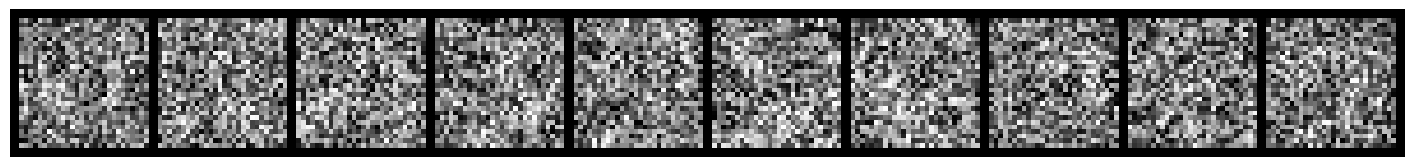

0 0.07663778960704803
1 0.014110869728028774
2 0.09431491792201996
3 0.06300051510334015
4 0.026437856256961823
5 0.11117615550756454
6 0.07312039285898209
7 0.008655006997287273
8 0.4211233854293823
9 0.03133057802915573

Epoch: 1
Loss: 1.8431751728057861


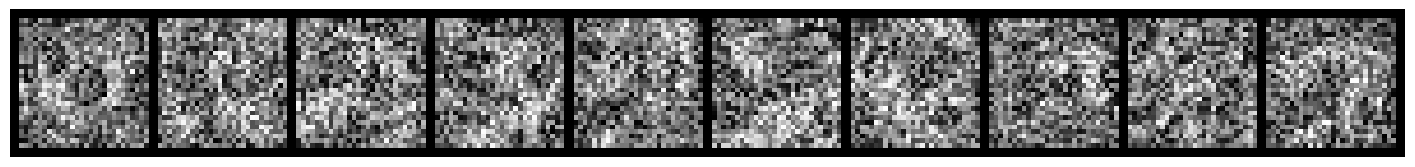

0 0.2955978512763977
1 0.07932297140359879
2 0.3886078894138336
3 0.343921422958374
4 0.11573081463575363
5 0.5490128397941589
6 0.3902651071548462
7 0.04152727872133255
8 0.6853163242340088
9 0.110537089407444

Epoch: 2
Loss: 1.1498236656188965


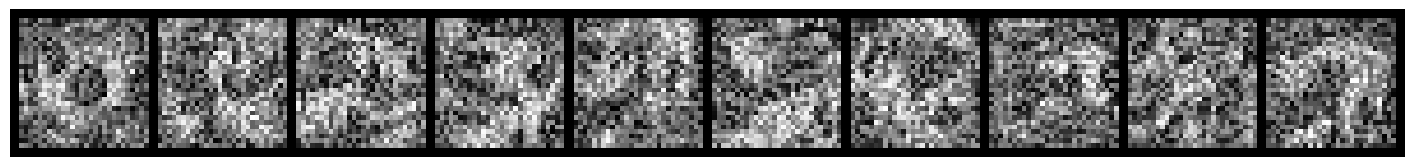

0 0.5968158841133118
1 0.24058620631694794
2 0.6640159487724304
3 0.6739869117736816
4 0.34371235966682434
5 0.8089340925216675
6 0.6926762461662292
7 0.09141933172941208
8 0.8253964185714722
9 0.2679443061351776

Epoch: 4
Loss: 0.5954267382621765


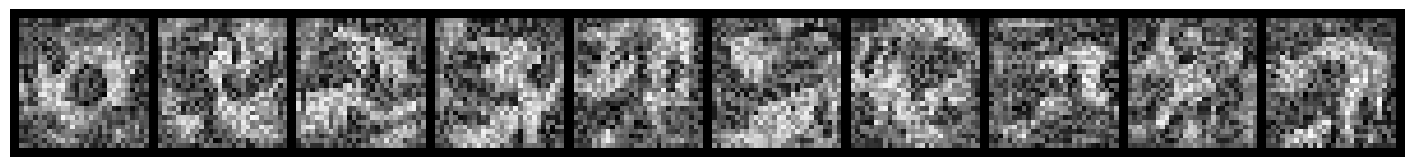

0 0.8919116258621216
1 0.5648860335350037
2 0.8982658982276917
3 0.9211964011192322
4 0.8261414170265198
5 0.9250660538673401
6 0.8827163577079773
7 0.3820836842060089
8 0.9414232969284058
9 0.72081458568573

Epoch: 8
Loss: 0.39890021085739136


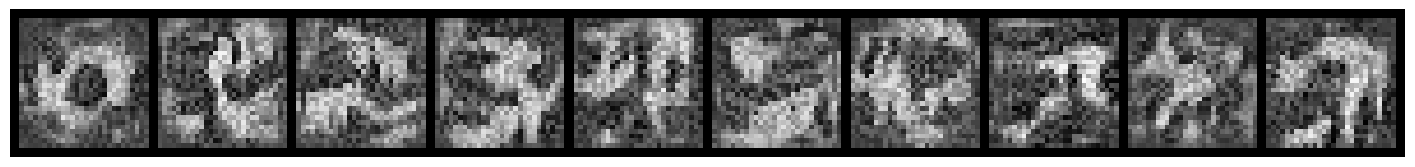

0 0.9860667586326599
1 0.937416136264801
2 0.9803449511528015
3 0.9868487119674683
4 0.9880030155181885
5 0.9719082117080688
6 0.9701729416847229
7 0.9503668546676636
8 0.9867188334465027
9 0.9649981260299683

Epoch: 16
Loss: 0.38506150245666504


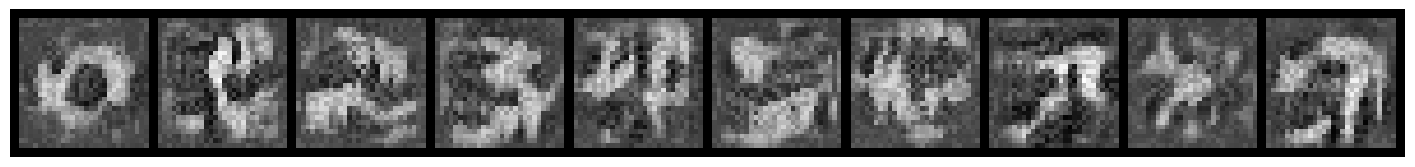

0 0.9965078234672546
1 0.9974787831306458
2 0.9941489696502686
3 0.9951068162918091
4 0.9980016350746155
5 0.9876728653907776
6 0.9889287352561951
7 0.9984930753707886
8 0.9907228350639343
9 0.9921147227287292

Epoch: 32
Loss: 0.2379198968410492


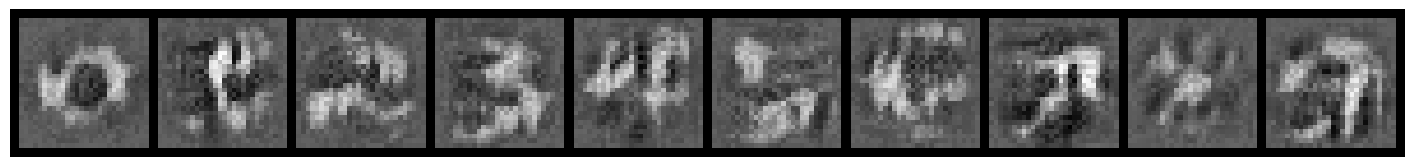

0 0.9887686967849731
1 0.9978427886962891
2 0.9857444167137146
3 0.9842325448989868
4 0.9971197843551636
5 0.9870963096618652
6 0.9822596907615662
7 0.9988734126091003
8 0.974891185760498
9 0.9881286025047302

Epoch: 64
Loss: 0.09493038058280945


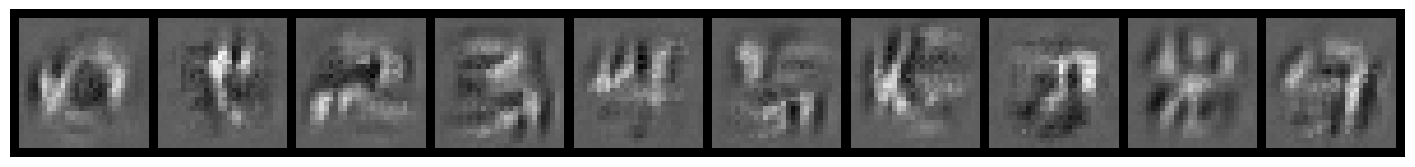

0 0.9725093841552734
1 0.9865977764129639
2 0.9800807237625122
3 0.9786385893821716
4 0.9933488965034485
5 0.9865299463272095
6 0.9819703102111816
7 0.9859791398048401
8 0.9752678275108337
9 0.9815772175788879

Epoch: 128
Loss: 0.06214522942900658


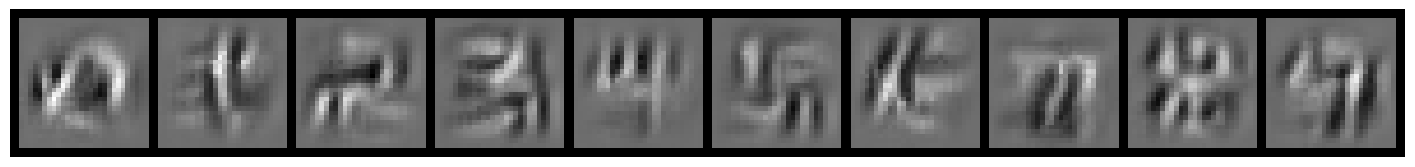

0 0.9740867614746094
1 0.986857533454895
2 0.9814528226852417
3 0.9793917536735535
4 0.9905564785003662
5 0.9881554841995239
6 0.9835233092308044
7 0.9870814681053162
8 0.9753431081771851
9 0.9813746809959412

Epoch: 256
Loss: 0.05734720081090927


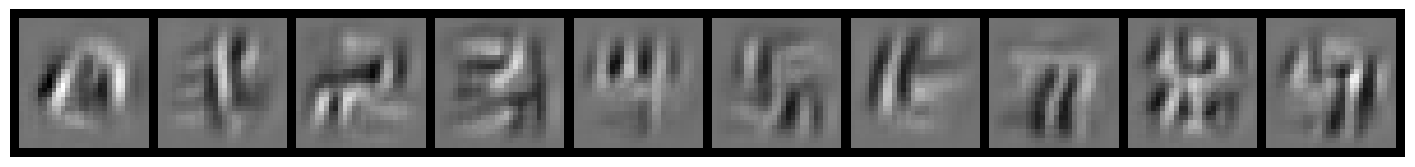

0 0.9766947031021118
1 0.9867151379585266
2 0.9813339114189148
3 0.9812674522399902
4 0.9906410574913025
5 0.9890137314796448
6 0.9856196641921997
7 0.9871768355369568
8 0.9758796691894531
9 0.9817258715629578

Epoch: 512
Loss: 0.05669129639863968


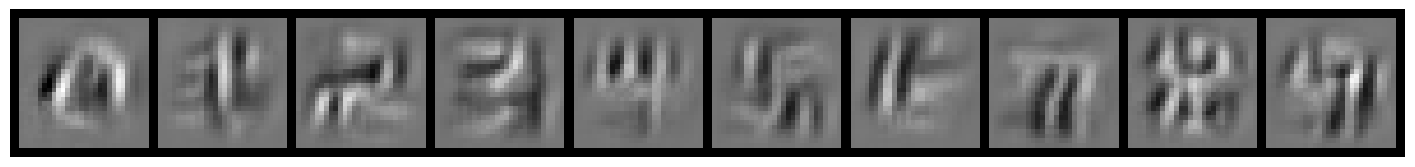

0 0.9768534898757935
1 0.9872181415557861
2 0.9813345670700073
3 0.9821680784225464
4 0.9906238913536072
5 0.9890446662902832
6 0.9857784509658813
7 0.9871834516525269
8 0.9758510589599609
9 0.9815903306007385

Epoch: 999
Loss: 0.056662000715732574


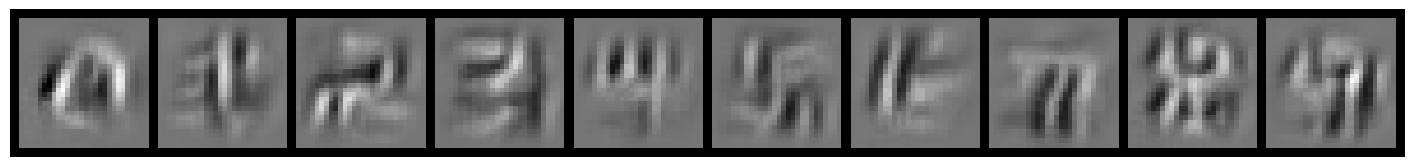

0 0.9766309261322021
1 0.9872146844863892
2 0.9813401103019714
3 0.9822123050689697
4 0.9906376004219055
5 0.9891232848167419
6 0.9858260750770569
7 0.9871909618377686
8 0.9764235615730286
9 0.9817575812339783


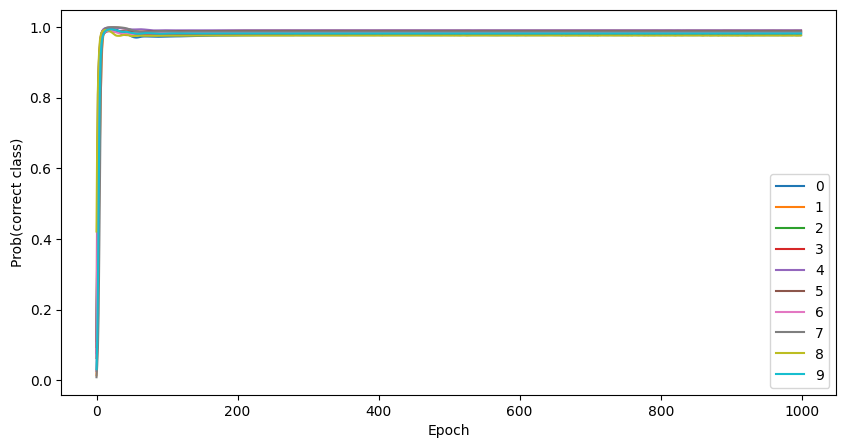

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

images = torch.rand(10, 1, 28, 28, device=device, requires_grad=True)

criterion = nn.CrossEntropyLoss()
targets = torch.arange(10, dtype=torch.long, device=device)
optimizer = torch.optim.Adam([images], lr=0.1)

num_epochs = 1000
prob_hist = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    logits = net(images)
    loss = criterion(logits, targets) + images.pow(2).mean()
    loss.backward()
    optimizer.step()

    probs = F.softmax(logits.detach().cpu(), dim=1)
    prob_hist.append([probs[i, i].item() for i in range(10)])

    if epoch in [0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 999]:
        print(f"\nEpoch: {epoch}")
        print(f"Loss: {loss}")
        grid = make_grid(images.detach().cpu(), nrow=10, padding=2, normalize=True)
        plt.figure(figsize=(18, 3))
        plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap="gray")
        plt.axis("off")
        plt.show()
        for i in range(10):
            print(i, probs[i, i].item())

prob_hist = torch.tensor(prob_hist)
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.plot(prob_hist[:, i], label=f"{i}")
plt.xlabel("Epoch")
plt.ylabel("Prob(correct class)")
plt.legend()
plt.show()

# Zadanie 2

Próbowałem różnych metod (widać je poniżej), ostatecznie udało mi się uzyskać taką metodę która pozwala zamienić każdą cyfrę od 0 do 9 tak aby sieć postrzegała ją jako dowolną inną (z prawdopodobieństwem ok 98%), tak aby cyfra była czytelna dla człowieka. Udało mi się to osiągnąć poprzez dodawanie szumu do obrazka przy każdej iteracji. Przy niskim lambda mamy dużo szumu i obrazek przestaje być rozpoznawalny przez człowieka, przy za wysokim obrazek nie zmienia się za bardzo i nie oszukujemy sieci.

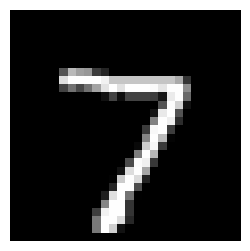

In [ ]:

grid = make_grid(testset[0][0], nrow=1, padding=2, normalize=True)
plt.figure(figsize=(18, 3))
plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap='gray')
plt.axis('off')
plt.show()

original = testset[0][0]

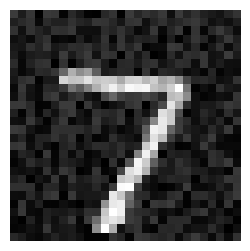

In [ ]:
noise = torch.rand(1, 1, 28, 28)
new = original+noise
grid = make_grid(new, nrow=1, padding=2, normalize=True)
plt.figure(figsize=(18, 3))
plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap='gray')
plt.axis('off')
plt.show()


Epoch: 0
Loss: 3.323925018310547


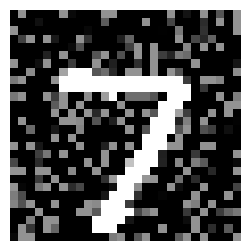

Prob. of 7: 0.30151277780532837
Prob. of 8: 0.09870713204145432
Predicted digit: 7

Epoch: 1000
Loss: 1.2716283798217773


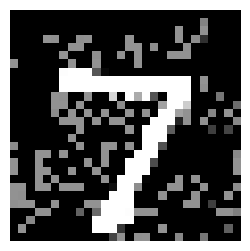

Prob. of 7: 0.11898726224899292
Prob. of 8: 0.33571383357048035
Predicted digit: 8

Epoch: 2000
Loss: 1.2708998918533325


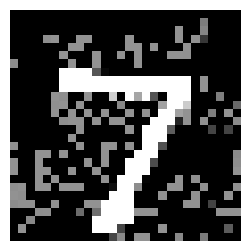

Prob. of 7: 0.11815936118364334
Prob. of 8: 0.3357767164707184
Predicted digit: 8

Epoch: 3000
Loss: 1.2725874185562134


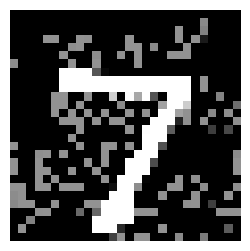

Prob. of 7: 0.11846009641885757
Prob. of 8: 0.33563557267189026
Predicted digit: 8

Epoch: 4000
Loss: 1.2719080448150635


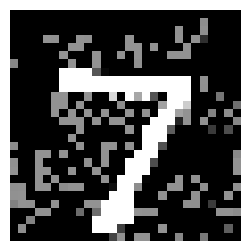

Prob. of 7: 0.11825709789991379
Prob. of 8: 0.33593815565109253
Predicted digit: 8

Epoch: 5000
Loss: 1.2727841138839722


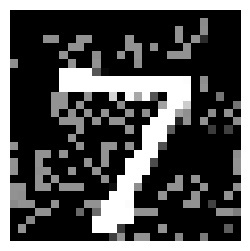

Prob. of 7: 0.11876902729272842
Prob. of 8: 0.33552128076553345
Predicted digit: 8

Epoch: 6000
Loss: 1.2737562656402588


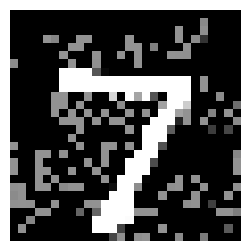

Prob. of 7: 0.11892540752887726
Prob. of 8: 0.33567503094673157
Predicted digit: 8

Epoch: 7000
Loss: 1.2733101844787598


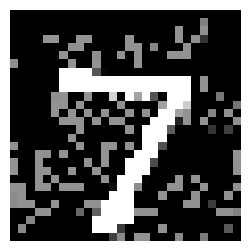

Prob. of 7: 0.1188879981637001
Prob. of 8: 0.3355451822280884
Predicted digit: 8

Epoch: 8000
Loss: 1.2711762189865112


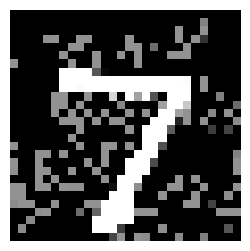

Prob. of 7: 0.11883031576871872
Prob. of 8: 0.3354405462741852
Predicted digit: 8

Epoch: 9000
Loss: 1.2726359367370605


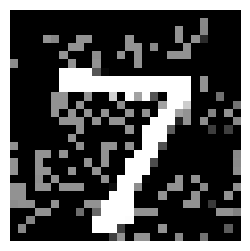

Prob. of 7: 0.11863008141517639
Prob. of 8: 0.33540329337120056
Predicted digit: 8

Epoch: 10000
Loss: 1.272507905960083


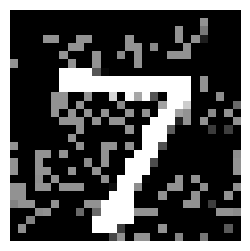

Prob. of 7: 0.11899062246084213
Prob. of 8: 0.33594128489494324
Predicted digit: 8


In [ ]:
 import torch.nn.functional as F
 original = testset[0][0].unsqueeze(0).to(device)          # 1 × 1 × 28 × 28
noise = torch.randn(1, 1, 28, 28, device=device, requires_grad=True)

criterion = nn.CrossEntropyLoss()
targets = torch.tensor([8], dtype=torch.long, device=device)

optimizer = torch.optim.Adam([noise], lr=0.1)
num_epochs = 10001

for epoch in range(num_epochs):
    optimizer.zero_grad()

    new = F.hardtanh(original + noise.clamp(0,1), 0.0, 1.0)
    logits = net(new)
    loss = criterion(logits, targets) + noise.pow(2).mean()

    loss.backward()
    optimizer.step()

    if epoch % 1000==0:
        print(f"\nEpoch: {epoch}")
        print(f"Loss: {loss}")

        grid = make_grid(new.detach().cpu(), nrow=1, padding=2, normalize=True)
        plt.figure(figsize=(18, 3))
        plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap="gray")
        plt.axis("off")
        plt.show()

        probs = F.softmax(logits.detach().cpu(), dim=1)
        print(f"Prob. of 7: {probs[0][7].item()}")
        print(f"Prob. of 8: {probs[0][8].item()}")
        pred_class = probs.argmax(dim=1).item()
        print("Predicted digit:", pred_class)


Epoch: 0
Loss: 3.9191360473632812


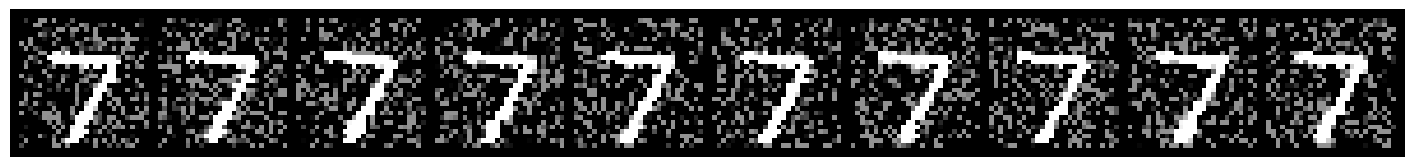

Copy 0 target 0 pred 3 prob 0.2438
Copy 1 target 1 pred 3 prob 0.2318
Copy 2 target 2 pred 7 prob 0.3073
Copy 3 target 3 pred 7 prob 0.2794
Copy 4 target 4 pred 7 prob 0.3762
Copy 5 target 5 pred 7 prob 0.3376
Copy 6 target 6 pred 7 prob 0.3680
Copy 7 target 7 pred 7 prob 0.3811
Copy 8 target 8 pred 7 prob 0.2528
Copy 9 target 9 pred 7 prob 0.2748

Epoch: 1000
Loss: 0.9989131689071655


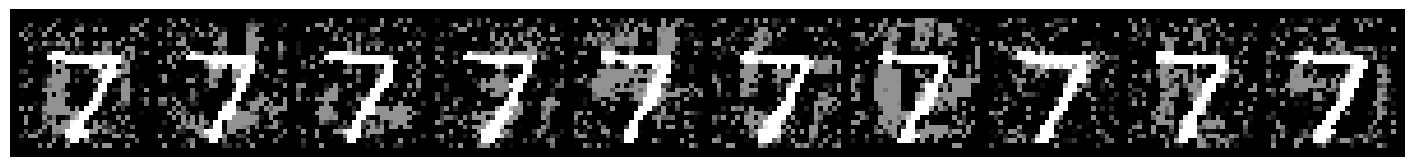

Copy 0 target 0 pred 0 prob 0.6421
Copy 1 target 1 pred 1 prob 0.3291
Copy 2 target 2 pred 2 prob 0.6176
Copy 3 target 3 pred 3 prob 0.8149
Copy 4 target 4 pred 4 prob 0.4856
Copy 5 target 5 pred 5 prob 0.7380
Copy 6 target 6 pred 8 prob 0.2835
Copy 7 target 7 pred 7 prob 0.8489
Copy 8 target 8 pred 8 prob 0.7763
Copy 9 target 9 pred 9 prob 0.6432

Epoch: 2000
Loss: 1.0023301839828491


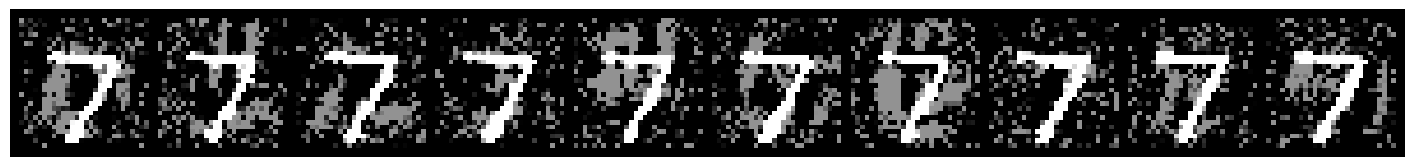

Copy 0 target 0 pred 0 prob 0.6404
Copy 1 target 1 pred 1 prob 0.3019
Copy 2 target 2 pred 2 prob 0.6746
Copy 3 target 3 pred 3 prob 0.7482
Copy 4 target 4 pred 4 prob 0.4799
Copy 5 target 5 pred 5 prob 0.7335
Copy 6 target 6 pred 8 prob 0.2649
Copy 7 target 7 pred 7 prob 0.8270
Copy 8 target 8 pred 8 prob 0.7373
Copy 9 target 9 pred 9 prob 0.6814

Epoch: 3000
Loss: 0.9817901849746704


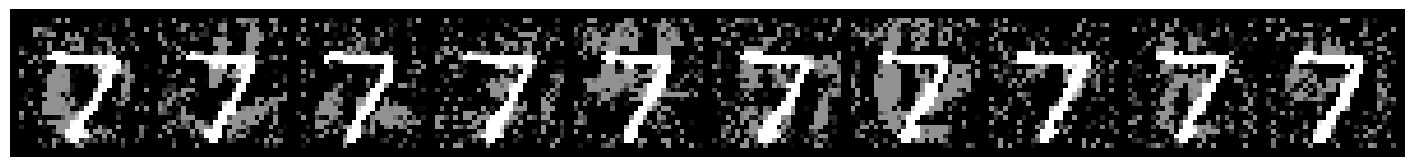

Copy 0 target 0 pred 0 prob 0.6469
Copy 1 target 1 pred 1 prob 0.3555
Copy 2 target 2 pred 2 prob 0.6620
Copy 3 target 3 pred 3 prob 0.8105
Copy 4 target 4 pred 4 prob 0.4885
Copy 5 target 5 pred 5 prob 0.7267
Copy 6 target 6 pred 8 prob 0.2497
Copy 7 target 7 pred 7 prob 0.8223
Copy 8 target 8 pred 8 prob 0.7910
Copy 9 target 9 pred 9 prob 0.6395

Epoch: 4000
Loss: 1.0178142786026


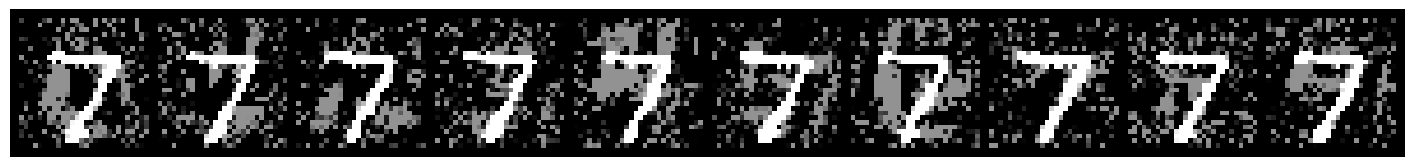

Copy 0 target 0 pred 0 prob 0.6748
Copy 1 target 1 pred 1 prob 0.2779
Copy 2 target 2 pred 2 prob 0.6830
Copy 3 target 3 pred 3 prob 0.7190
Copy 4 target 4 pred 4 prob 0.5071
Copy 5 target 5 pred 5 prob 0.6521
Copy 6 target 6 pred 8 prob 0.3355
Copy 7 target 7 pred 7 prob 0.8809
Copy 8 target 8 pred 8 prob 0.7482
Copy 9 target 9 pred 9 prob 0.7110

Epoch: 5000
Loss: 0.9826448559761047


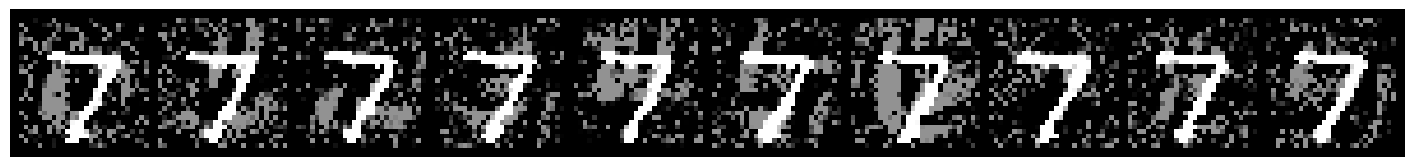

Copy 0 target 0 pred 0 prob 0.6300
Copy 1 target 1 pred 1 prob 0.3237
Copy 2 target 2 pred 2 prob 0.6637
Copy 3 target 3 pred 3 prob 0.8016
Copy 4 target 4 pred 4 prob 0.4501
Copy 5 target 5 pred 5 prob 0.7982
Copy 6 target 6 pred 8 prob 0.2618
Copy 7 target 7 pred 7 prob 0.8848
Copy 8 target 8 pred 8 prob 0.7384
Copy 9 target 9 pred 9 prob 0.6846


In [ ]:
original_single = testset[0][0].unsqueeze(0).to(device)
original = original_single.repeat(10, 1, 1, 1)
noise = torch.randn(10, 1, 28, 28, device=device, requires_grad=True)

criterion = nn.CrossEntropyLoss()
targets = torch.arange(10, dtype=torch.long, device=device)

optimizer = torch.optim.Adam([noise], lr=0.1)
num_epochs = 5001

for epoch in range(num_epochs):
    optimizer.zero_grad()
    new = F.hardtanh(original + (noise-0.5*torch.randn(10, 1, 28, 28, device=device)+0.5*torch.randn(10, 1, 28, 28, device=device)).clamp(-1.0,1.0), 0.0, 1.0)
    logits = net(new)
    loss = criterion(logits, targets) + 1.0*noise.pow(2).mean()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"\nEpoch: {epoch}")
        print(f"Loss: {loss}")
        grid = make_grid(new.detach().cpu(), nrow=10, padding=2, normalize=True)
        plt.figure(figsize=(18, 3))
        plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap="gray")
        plt.axis("off")
        plt.show()
        probs = F.softmax(logits.detach().cpu(), dim=1)
        preds = probs.argmax(dim=1)
        for i in range(10):
            print(f"Copy {i} target {targets[i].item()} pred {preds[i].item()} prob {probs[i][preds[i]].item():.4f}")

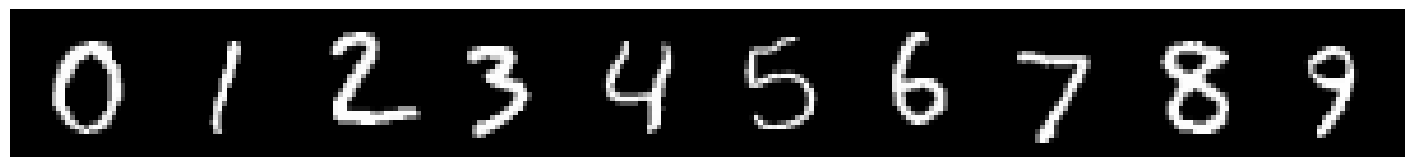

In [ ]:
digits = [testset[i][0] for i in [13,57,1,30,4,53,21,0,899,759]]
grid = make_grid(digits, nrow=10, padding=2, normalize=True)
plt.figure(figsize=(18, 3))
plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap="gray")
plt.axis("off")
plt.show()


Epoch: 5000
Loss: 0.007465299218893051


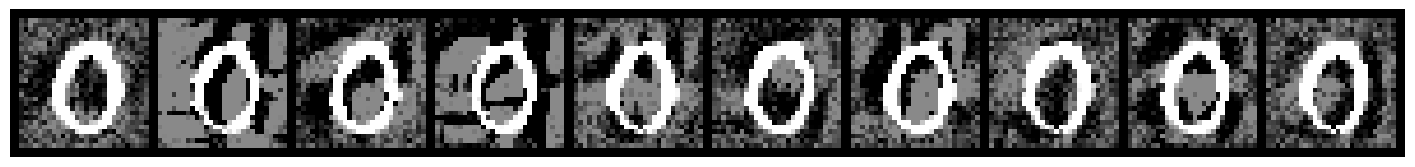

Copy 0 target 0 pred 0 prob 0.9992
Copy 1 target 1 pred 1 prob 0.9820
Copy 2 target 2 pred 2 prob 0.9980
Copy 3 target 3 pred 3 prob 0.9893
Copy 4 target 4 pred 4 prob 0.9989
Copy 5 target 5 pred 5 prob 0.9995
Copy 6 target 6 pred 6 prob 0.9968
Copy 7 target 7 pred 7 prob 0.9996
Copy 8 target 8 pred 8 prob 0.9984
Copy 9 target 9 pred 9 prob 0.9994

Epoch: 5000
Loss: 0.003505831118673086


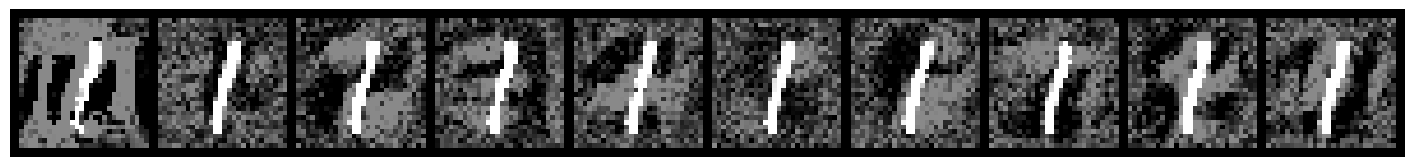

Copy 0 target 0 pred 0 prob 0.9879
Copy 1 target 1 pred 1 prob 0.9996
Copy 2 target 2 pred 2 prob 0.9992
Copy 3 target 3 pred 3 prob 0.9994
Copy 4 target 4 pred 4 prob 0.9995
Copy 5 target 5 pred 5 prob 0.9998
Copy 6 target 6 pred 6 prob 0.9994
Copy 7 target 7 pred 7 prob 0.9996
Copy 8 target 8 pred 8 prob 0.9986
Copy 9 target 9 pred 9 prob 0.9989

Epoch: 5000
Loss: 0.01754733920097351


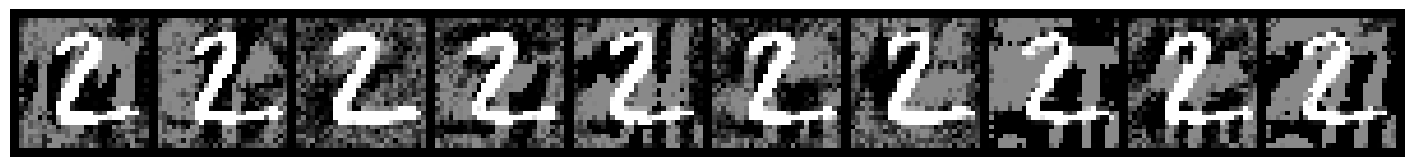

Copy 0 target 0 pred 0 prob 0.9960
Copy 1 target 1 pred 1 prob 0.9975
Copy 2 target 2 pred 2 prob 0.9995
Copy 3 target 3 pred 3 prob 0.9984
Copy 4 target 4 pred 4 prob 0.9965
Copy 5 target 5 pred 5 prob 0.9988
Copy 6 target 6 pred 6 prob 0.9986
Copy 7 target 7 pred 7 prob 0.9455
Copy 8 target 8 pred 8 prob 0.9975
Copy 9 target 9 pred 9 prob 0.9538

Epoch: 5000
Loss: 0.008169478736817837


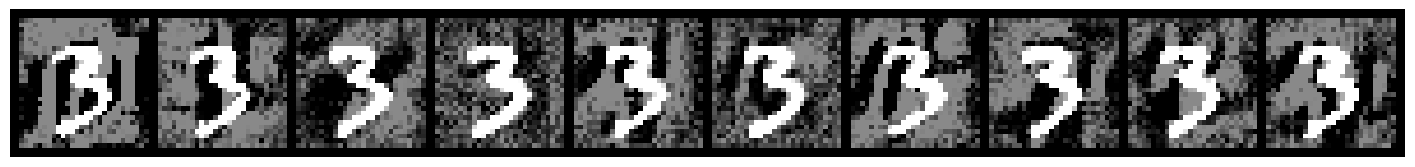

Copy 0 target 0 pred 0 prob 0.9755
Copy 1 target 1 pred 1 prob 0.9963
Copy 2 target 2 pred 2 prob 0.9977
Copy 3 target 3 pred 3 prob 0.9996
Copy 4 target 4 pred 4 prob 0.9983
Copy 5 target 5 pred 5 prob 0.9997
Copy 6 target 6 pred 6 prob 0.9950
Copy 7 target 7 pred 7 prob 0.9968
Copy 8 target 8 pred 8 prob 0.9980
Copy 9 target 9 pred 9 prob 0.9970

Epoch: 5000
Loss: 0.003405368886888027


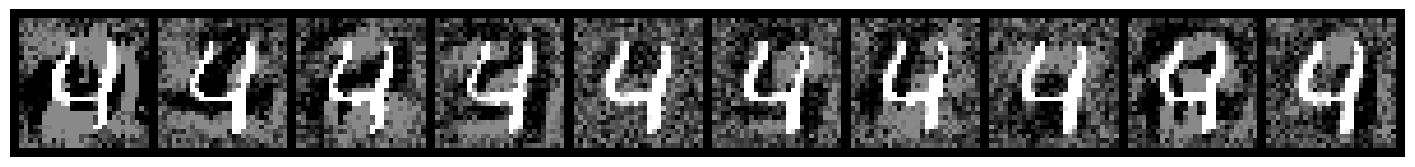

Copy 0 target 0 pred 0 prob 0.9921
Copy 1 target 1 pred 1 prob 0.9989
Copy 2 target 2 pred 2 prob 0.9988
Copy 3 target 3 pred 3 prob 0.9993
Copy 4 target 4 pred 4 prob 0.9999
Copy 5 target 5 pred 5 prob 0.9996
Copy 6 target 6 pred 6 prob 0.9993
Copy 7 target 7 pred 7 prob 0.9998
Copy 8 target 8 pred 8 prob 0.9988
Copy 9 target 9 pred 9 prob 0.9996

Epoch: 5000
Loss: 0.004023938439786434


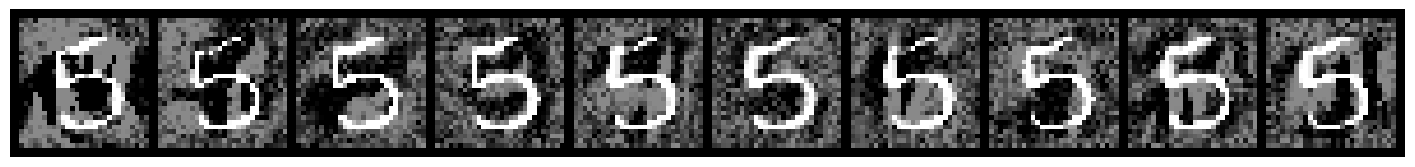

Copy 0 target 0 pred 0 prob 0.9908
Copy 1 target 1 pred 1 prob 0.9977
Copy 2 target 2 pred 2 prob 0.9991
Copy 3 target 3 pred 3 prob 0.9993
Copy 4 target 4 pred 4 prob 0.9996
Copy 5 target 5 pred 5 prob 0.9997
Copy 6 target 6 pred 6 prob 0.9991
Copy 7 target 7 pred 7 prob 0.9994
Copy 8 target 8 pred 8 prob 0.9985
Copy 9 target 9 pred 9 prob 0.9984

Epoch: 5000
Loss: 0.005325836129486561


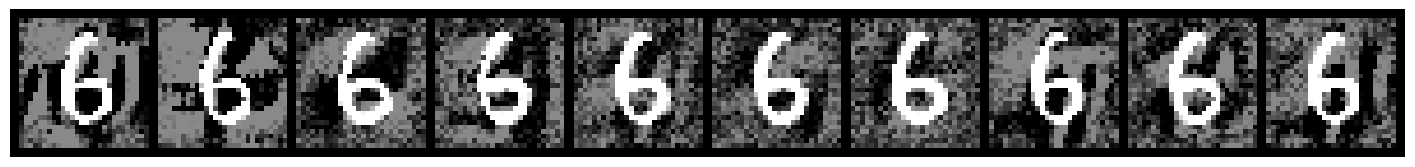

Copy 0 target 0 pred 0 prob 0.9927
Copy 1 target 1 pred 1 prob 0.9888
Copy 2 target 2 pred 2 prob 0.9992
Copy 3 target 3 pred 3 prob 0.9988
Copy 4 target 4 pred 4 prob 0.9998
Copy 5 target 5 pred 5 prob 0.9997
Copy 6 target 6 pred 6 prob 0.9996
Copy 7 target 7 pred 7 prob 0.9984
Copy 8 target 8 pred 8 prob 0.9992
Copy 9 target 9 pred 9 prob 0.9983

Epoch: 5000
Loss: 0.006184645928442478


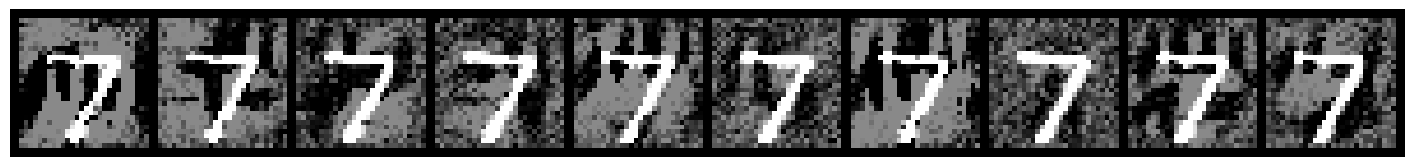

Copy 0 target 0 pred 0 prob 0.9876
Copy 1 target 1 pred 1 prob 0.9979
Copy 2 target 2 pred 2 prob 0.9992
Copy 3 target 3 pred 3 prob 0.9993
Copy 4 target 4 pred 4 prob 0.9969
Copy 5 target 5 pred 5 prob 0.9997
Copy 6 target 6 pred 6 prob 0.9921
Copy 7 target 7 pred 7 prob 0.9998
Copy 8 target 8 pred 8 prob 0.9983
Copy 9 target 9 pred 9 prob 0.9987

Epoch: 5000
Loss: 0.012446883134543896


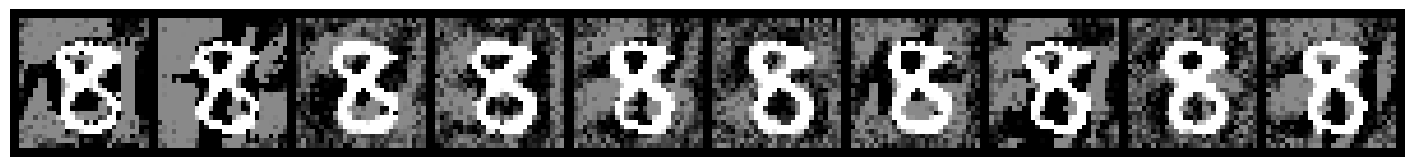

Copy 0 target 0 pred 0 prob 0.9764
Copy 1 target 1 pred 1 prob 0.9595
Copy 2 target 2 pred 2 prob 0.9986
Copy 3 target 3 pred 3 prob 0.9991
Copy 4 target 4 pred 4 prob 0.9989
Copy 5 target 5 pred 5 prob 0.9994
Copy 6 target 6 pred 6 prob 0.9981
Copy 7 target 7 pred 7 prob 0.9947
Copy 8 target 8 pred 8 prob 0.9993
Copy 9 target 9 pred 9 prob 0.9969

Epoch: 5000
Loss: 0.00493771955370903


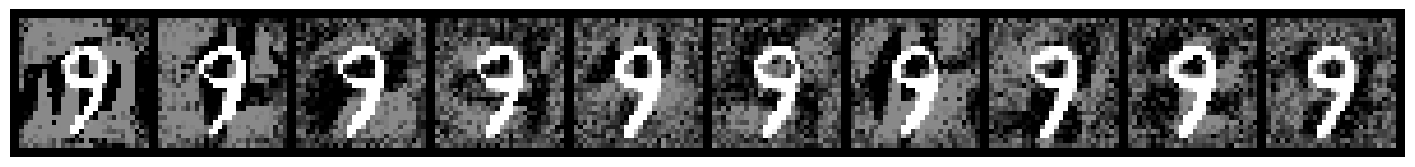

Copy 0 target 0 pred 0 prob 0.9846
Copy 1 target 1 pred 1 prob 0.9961
Copy 2 target 2 pred 2 prob 0.9991
Copy 3 target 3 pred 3 prob 0.9993
Copy 4 target 4 pred 4 prob 0.9996
Copy 5 target 5 pred 5 prob 0.9996
Copy 6 target 6 pred 6 prob 0.9981
Copy 7 target 7 pred 7 prob 0.9992
Copy 8 target 8 pred 8 prob 0.9993
Copy 9 target 9 pred 9 prob 0.9995


In [ ]:
for digit in digits:
  original_single = digit.unsqueeze(0).to(device)
  original = original_single.repeat(10, 1, 1, 1)
  noise = torch.randn(10, 1, 28, 28, device=device, requires_grad=True)

  criterion = nn.CrossEntropyLoss()
  targets = torch.arange(10, dtype=torch.long, device=device)

  optimizer = torch.optim.Adam([noise], lr=0.1)
  num_epochs = 5001

  for epoch in range(num_epochs):
      optimizer.zero_grad()
      new = F.hardtanh(original + (noise-0.2*torch.randn(10, 1, 28, 28, device=device)+0.2*torch.randn(10, 1, 28, 28, device=device)).clamp(-2.0,0.5), -1.0, 1.0)
      logits = net(new)
      loss = criterion(logits, targets) + 0.01*noise.pow(2).mean()
      loss.backward()
      optimizer.step()


  print(f"\nEpoch: {epoch}")
  print(f"Loss: {loss}")
  grid = make_grid(new.detach().cpu(), nrow=10, padding=2, normalize=True)
  plt.figure(figsize=(18, 3))
  plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap="gray")
  plt.axis("off")
  plt.show()
  probs = F.softmax(logits.detach().cpu(), dim=1)
  preds = probs.argmax(dim=1)
  for i in range(10):
    print(f"Copy {i} target {targets[i].item()} pred {preds[i].item()} prob {probs[i][preds[i]].item():.4f}")